In [1]:
import sys
sys.executable

'/usr/local/opt/python/bin/python3.7'

In [2]:
import numpy as np
import pandas as pd
from scipy.spatial import KDTree
from scipy.stats import expon
import math

import matplotlib.pyplot as plt

from copy import deepcopy

import pickle

In [3]:
x_goal = np.array([0.9, 0.9])

In [4]:
# r_n function
def r(n, D):
    return (n ** (-1/(2*D))) / 5 

In [11]:
n = 50000
D = 2

In [5]:
distances = []
S_n = []
counts = []

#g = open('slurm scripts/data/06-24-20/asymptotics-dim2_n50000.out', 'r')
#for line in g:
#    distances.append(float(line))

filename = 'slurm scripts/data/06-24-20/path_points/'
for i in range(1,501):
    #if distances[i] == float('inf'):
    #    S_n.append(float('inf'))
    #    continue
    f = open(filename+str(i)+'-dim2-n50000_pathpoints.pkl', "rb")
    pathpoints = pickle.load(f)
    s_n = 0
    for j in range(len(pathpoints)-2):
        s_n += np.linalg.norm(pathpoints[j+1] - pathpoints[j])
    S_n.append(s_n)
    distances.append(s_n + np.linalg.norm(pathpoints[-1] - pathpoints[-2]))
    counts.append(len(pathpoints)-2)
    
    if pathpoints[-1][0] != 0.9 or pathpoints[-1][1] != 0.9:
        print(i)

        
distances = np.array(distances)
S_n = np.array(S_n)
counts = np.array(counts)

In [6]:
edge_lengths = []
angle_displacements = []
for i in range(1, 501):
    f = open(filename+str(i)+'-dim2-n50000_pathpoints.pkl', "rb")
    pathpoints = pickle.load(f)
    for j in range(len(pathpoints)-2):
        edge_lengths.append(np.linalg.norm(pathpoints[j+1] - pathpoints[j]))
        
        #if j == len(pathpoints)-3:
        #    continue
        
        vect_1 = pathpoints[j+1] - pathpoints[j]
        vect_2 = x_goal - pathpoints[j]
        angle = math.atan2( vect_1[0]*vect_2[1] - vect_1[1]*vect_2[0], vect_1[0]*vect_2[0] + vect_1[1]*vect_2[1])
        angle_displacements.append(angle)

In [8]:
test = []
for i in range(100000):
    test.append((np.random.uniform()) ** 0.5)

In [10]:
np.mean(test)

0.6675937674940841

In [12]:
0.8 * np.sqrt(2) / (r(n, D) * 2/3)

126.88455161286771

Text(0.5, 1.0, '17 bins')

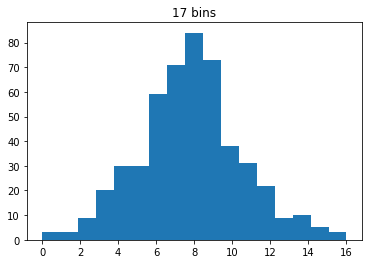

In [55]:
num = 17
plt.hist(counts - 114, bins=num)
plt.title(str(num) + ' bins')

In [38]:
(0.8 * np.sqrt(2))/122

0.009273531556544888

In [41]:
(0.8 * np.sqrt(2))/(122 * r(n, D))

0.6933582055347963

In [19]:
print(np.mean(counts))
print(np.std(counts - np.mean(counts)) ** 2)

121.792
8.152735999999997


In [50]:
(np.std(counts - np.mean(counts)) ** 2) / (1/4)

32.61094399999999

In [24]:
max(counts - 114)

16

Text(0.5, 1.0, '17 bins')

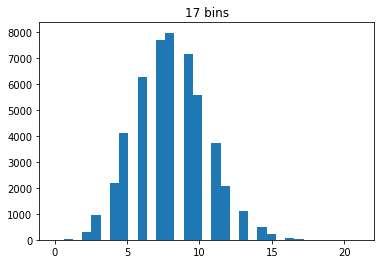

In [53]:
test = np.random.binomial(n=32, p=0.25, size=50000)
plt.hist(test, bins=33)
plt.title(str(17) + ' bins')

In [49]:
set(test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}